In [223]:
portcef['ef_Risk'] = ef_variances

In [1]:
import TS_ShortMemory as TS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [237]:
# Best solution (Portfolio) for each value of lambda (51 values)
def Solutions(ReturnSD_path, corr_path, tenure_1, tenure_2, termination):
    Lambda_values =  np.arange(0,1.02, 0.02)
    Solutions = []
    Return = []
    Risk = []
    for Lambda_value in Lambda_values:
        T_POP = TS.POP(ReturnSD_path= ReturnSD_path ,
                            corr_path= corr_path ,Lambda= round(Lambda_value,3),
                            k=10, epsilon=0.01, delta=1)
        Best_solution, Best_objval = T_POP.TSearch(tenure_1,tenure_2,termination)
        obj1 = T_POP.Objfun(Best_solution, Return='Obj1')
        obj2 = T_POP.Objfun(Best_solution, Return='Obj2')
        Solutions.append(Best_solution)
        Risk.append(round(obj1,10))
        Return.append(round(obj2,10))
    df = pd.DataFrame(list(zip(Return, Risk)), columns=['Return', 'Risk'])
    return Solutions, df
       

In [238]:
solutions, portcef = Solutions("Data/Hong_Kong_31/Return&SD.txt", "Data/Hong_Kong_31/correlation.txt",10,20,100)

 Tabu => Inadmissible
   Candidate Move: D asset 29, Objvalue: 0.0006640582558577755 => Tabu => Inadmissible
   Candidate Move: D asset 30, Objvalue: 0.0006641044587368215 => Tabu => Inadmissible
   Candidate Move: I asset 26, Objvalue: 0.0006655013882702058 => Least non-improving => Admissible


### iter 130###  Current_Objvalue: 0.0006655013882702058, Best_Objvalue: 0.0006454892228784541
   Candidate Move: I asset 28, Objvalue: 0.0006529571221968291 => Tabu => Inadmissible
   Candidate Move: D asset 2, Objvalue: 0.0006641187321220975 => Tabu => Inadmissible
   Candidate Move: D asset 13, Objvalue: 0.0006651644858611242 => Tabu => Inadmissible
   Candidate Move: D asset 17, Objvalue: 0.0006674258240299165 => Least non-improving => Admissible


### iter 131###  Current_Objvalue: 0.0006674258240299165, Best_Objvalue: 0.0006454892228784541
   Candidate Move: I asset 28, Objvalue: 0.0006538533603573884 => Tabu => Inadmissible
   Candidate Move: D asset 2, Objvalue: 0.000664903440203583 =>

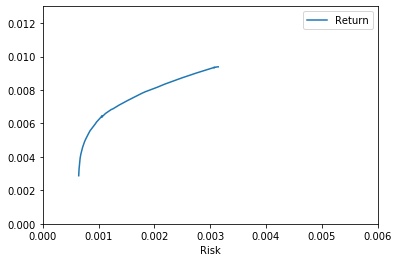

In [239]:
# Constrained Efficient frontier
portcef.plot(x = "Risk", y ='Return')
plt.xlim([0, 0.006]);
plt.ylim([0, 0.013]);

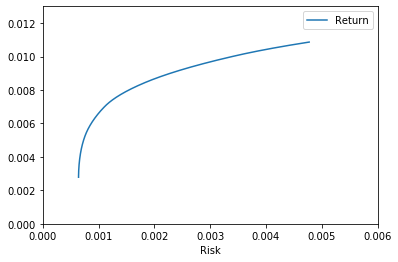

In [240]:
# Unconstrained Efficient frontier
portef = pd.read_csv("Data\Hong_Kong_31\portef.txt", sep='\t', header=None,names = ['Return', 'Risk'])
portef.plot(x = "Risk", y ='Return')
plt.xlim([0, 0.006]);
plt.ylim([0, 0.013]);

In [242]:
# Variance error
ef_variances = []

for i in portcef.Return:
    col = portef[round(portef.Return,6) == round(i,6)].values.tolist()
    if len(col)== 0:
        col = portef[round(portef.Return,5) == round(i,5)].values.tolist()
    sum = 0
    for item in col:
        sum += item[1]
    ef_Risk = sum/len(col)

    ef_variances.append(ef_Risk)
# Return Error
ef_returns = []
for i in portcef.Risk:
    col = portef[round(portef.Risk,6) == round(i,6)].values.tolist()
    if len(col)== 0:
        col = portef[round(portef.Risk,5) == round(i,5)].values.tolist()
    sum = 0
    for item in col:
        sum += item[0]
    ef_Return = sum/len(col)
    ef_returns.append(ef_Return)
    
portcef['ef_Return'] =  ef_returns
portcef['ef_Risk'] = ef_variances


In [245]:
portcef.head()

,Return,Risk,ef_Return,ef_Risk
0,0.009386,0.003146,0.009802,0.002671
1,0.009386,0.003146,0.009802,0.002671
2,0.009386,0.003146,0.009802,0.002671
3,0.009386,0.003146,0.009802,0.002671
4,0.009386,0.003146,0.009802,0.002671


In [261]:
# Return Error
portcef = portcef.assign(Return_Error = lambda portcef : 100 * (portcef.ef_Return - portcef.Return) / portcef.ef_Return)
#Variance Error
portcef = portcef.assign(Risk_Error = lambda portcef : 100 * (portcef.Risk - portcef.ef_Risk) /portcef.ef_Risk)

In [263]:
portcef.head()

,Return,Risk,ef_Return,ef_Risk,Return_Error,Risk_Error
0,0.009386,0.003146,0.009802,0.002671,4.244849,17.792895
1,0.009386,0.003146,0.009802,0.002671,4.244849,17.792895
2,0.009386,0.003146,0.009802,0.002671,4.244849,17.792895
3,0.009386,0.003146,0.009802,0.002671,4.244849,17.792895
4,0.009386,0.003146,0.009802,0.002671,4.244849,17.792895


In [271]:
print("Variance of return error: {}\nMean return error: {}".format(round(portcef.Risk_Error.mean(),4),
round(portcef.Return_Error.mean(),4)))

Variance of return error: 14.7119
Mean return error: 5.097
